<a href="https://colab.research.google.com/github/Jaypardeshii/Bike-Sharing-Demand-Prediction/blob/main/Copy_of_Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [1]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Mounting drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# read dataset
df = pd.read_csv('/content/drive/MyDrive/Datasets/SeoulBikeData.csv', encoding= 'unicode_escape')

## Overview of data

In [ ]:
#data inspection  
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [ ]:
df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [ ]:
df.shape

(8760, 14)

## Data Cleaning

In [5]:
#null value checking 
df.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [6]:
# create df copy
df_copy = df.copy(deep=True)

In [7]:
#changing date from object to datetime 
df_copy['Date'] = pd.to_datetime(df_copy['Date'])

In [ ]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   int64  
 1   Hour                       8760 non-null   int64  
 2   Temperature(°C)            8760 non-null   float64
 3   Humidity(%)                8760 non-null   int64  
 4   Wind speed (m/s)           8760 non-null   float64
 5   Visibility (10m)           8760 non-null   int64  
 6   Dew point temperature(°C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)    8760 non-null   float64
 8   Rainfall(mm)               8760 non-null   float64
 9   Snowfall (cm)              8760 non-null   float64
 10  Seasons                    8760 non-null   object 
 11  Holiday                    8760 non-null   object 
 12  Functioning Day            8760 non-null   object 
 13  month                      8760 non-null   int64

In [8]:
#extracting day,month, day of week and weekdays/weekend from date column

df_copy['month'] = df_copy['Date'].apply(lambda x : x.month)
df_copy['day_of_week'] = df_copy['Date'].dt.day_name()
df_copy['weekdays_weekend']=df_copy['day_of_week'].apply(lambda x : 1 if x=='Saturday' or x=='Sunday' else 0 )
df_copy = df_copy.drop(columns=['Date','day_of_week'],axis=1)

## **EDA**

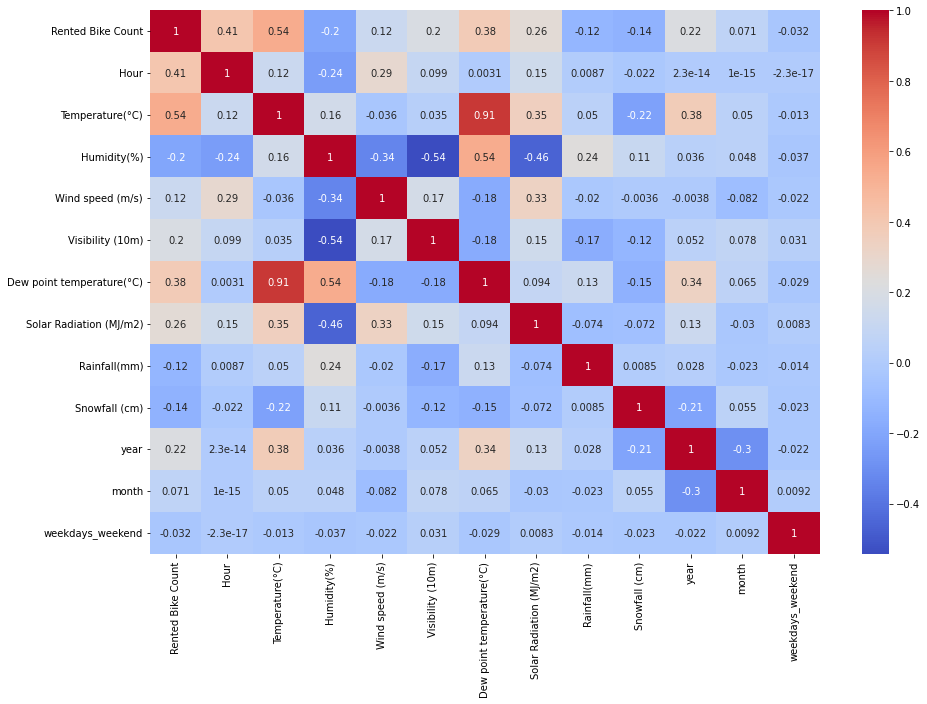

In [ ]:
#checking correlation using heatmap

plt.figure(figsize=(15,10))
sns.heatmap(df_copy.corr(),cmap='coolwarm',annot=True)

Text(0.5, 1.0, 'Season wise Rented Bike %')

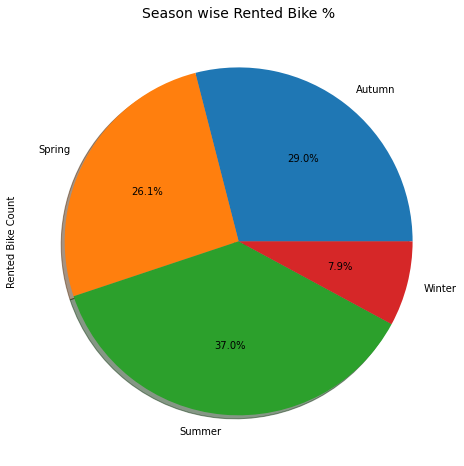

In [ ]:
sdf=df_copy.groupby('Seasons').sum()
sdf['Rented Bike Count'].plot(kind='pie',autopct='%1.1f%%',figsize=(15,8), shadow=True)
plt.title('Season wise Rented Bike %',fontsize=14)

Conclusion

we can clearly see that there is less demand of rented bike during winter season

Text(0, 0.5, 'Rented Bike Count')

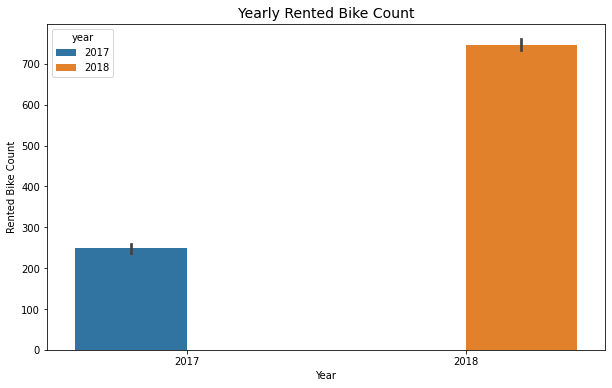

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(data=df_copy, x = 'year', y = 'Rented Bike Count', hue = 'year')
plt.title('Yearly Rented Bike Count',fontsize = 14)
plt.xlabel('Year')
plt.ylabel('Rented Bike Count')

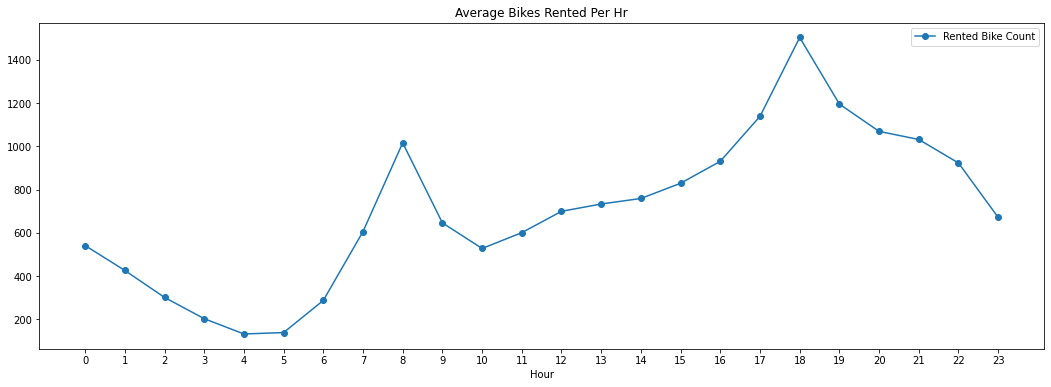

In [ ]:
rent_hr = df_copy.groupby('Hour')['Rented Bike Count'].mean()
plt.figure(figsize=(18,6))
a=rent_hr.plot(legend=True,marker='o',title="Average Bikes Rented Per Hr")
a.set_xticks(range(len(rent_hr)));

Conclusion

High rise of Rented Bikes from 8:00 a.m to 9:00 p.m means people prefer rented bike during rush hour.

we can clearly see that demand rises most at 8 a.m and 6:00 p.m so we can say that that during office opening and closing time there is much high demand

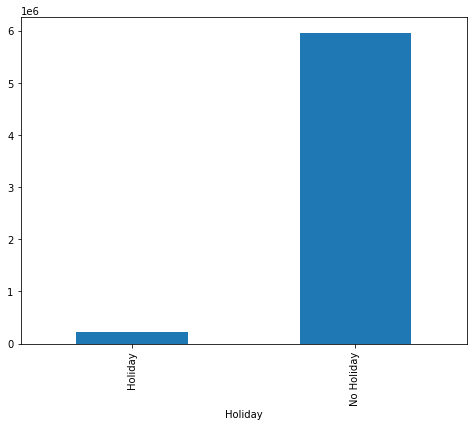

In [ ]:
df_holi = df_copy.groupby('Holiday').sum()['Rented Bike Count']
fig, ax = plt.subplots(figsize=(8,6))
df_holi.plot(kind='bar', ax=ax)

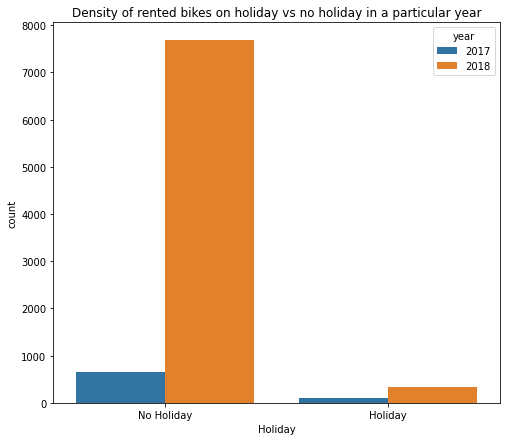

In [ ]:
plt.figure(figsize=(8,7))
sns.countplot(x='Holiday', hue = 'year', data= df_copy)
plt.title('Density of rented bikes on holiday vs no holiday in a particular year')
plt.show()

In [9]:
# dataframe containing the count of bikes rented in differant intensities of rainfall
df_rain = pd.DataFrame(df.groupby('Rainfall(mm)')['Rented Bike Count'].sum())
df_rain.reset_index(inplace=True)
df_rain.head()

,Rainfall(mm),Rented Bike Count
0,0.0,6086009
1,0.1,15179
2,0.2,3706
3,0.3,1401
4,0.4,2147


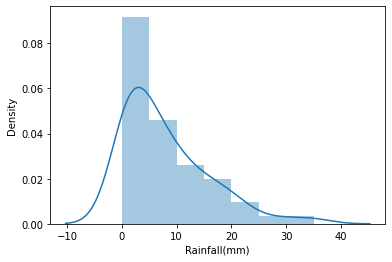

In [ ]:
#distribution of bike rentals according to rainfall intensity
sns.distplot(df_rain['Rainfall(mm)'])

Above plot shows that people tend to rent bikes when there is no or less rainfall.

In [105]:
# creating a dataframe containing the count of bikes rented in differant intensities of snowfall

df_snow = pd.DataFrame(df.groupby('Snowfall (cm)')['Rented Bike Count'].sum())
df_snow.reset_index(inplace=True)

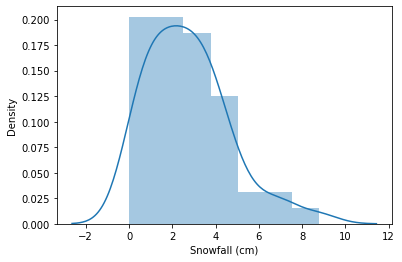

In [106]:
# plot showing distribution of bike rentals according to snowfall intensity

sns.distplot(df_snow['Snowfall (cm)'])

Above plot shows that people tend to rent bikes when there is no or less snowfall.

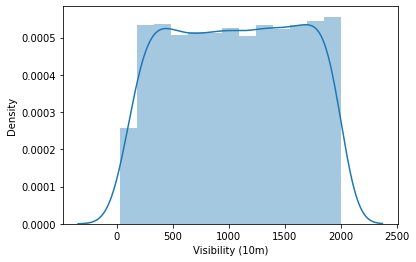

In [ ]:
# creating a dataframe containing the count of bikes rented in differant visibility ranges
df_visi = pd.DataFrame(df.groupby('Visibility (10m)')['Rented Bike Count'].sum())
df_visi.reset_index(inplace=True)
sns.distplot(df_visi['Visibility (10m)'])


## **Preprocessing the data**

In [10]:
# Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):
   # Calculating VIF
   vif = pd.DataFrame()
   vif["variables"] = X.columns
   vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
 
   return(vif)

In [11]:
calc_vif(df_copy[[i for i in df.describe().columns if i not in ['Rented Bike Count','Dew point temperature(°C)'] ]])

,variables,VIF
0,Hour,3.921832
1,Temperature(°C),3.228318
2,Humidity(%),4.868221
3,Wind speed (m/s),4.608625
4,Visibility (10m),4.710170
5,Solar Radiation (MJ/m2),2.246791
6,Rainfall(mm),1.079158
7,Snowfall (cm),1.120579


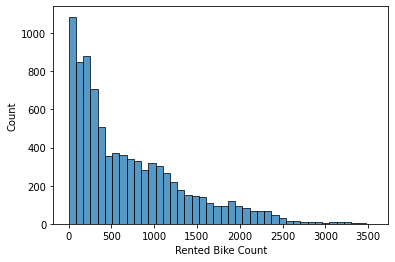

In [ ]:
#visualising distribution
sns.histplot(df['Rented Bike Count'])

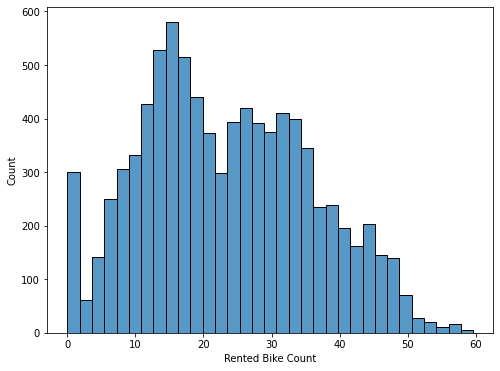

In [ ]:
# square_root transformation
plt.figure(figsize=(8,6))
sns.histplot(np.sqrt(df['Rented Bike Count']))

In [13]:
numeric_features = df_copy.select_dtypes(exclude='object')

In [ ]:
# Numeric Features info
numeric_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   int64  
 1   Hour                       8760 non-null   int64  
 2   Temperature(°C)            8760 non-null   float64
 3   Humidity(%)                8760 non-null   int64  
 4   Wind speed (m/s)           8760 non-null   float64
 5   Visibility (10m)           8760 non-null   int64  
 6   Dew point temperature(°C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)    8760 non-null   float64
 8   Rainfall(mm)               8760 non-null   float64
 9   Snowfall (cm)              8760 non-null   float64
 10  Holiday                    8760 non-null   float64
 11  Functioning Day            8760 non-null   float64
 12  month                      8760 non-null   int64  
 13  weekdays_weekend           8760 non-null   int64

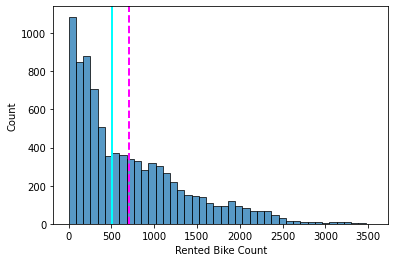

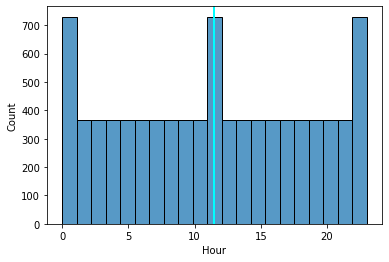

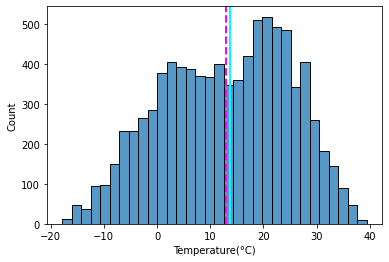

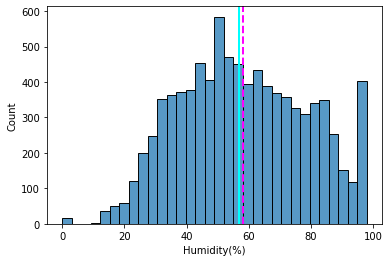

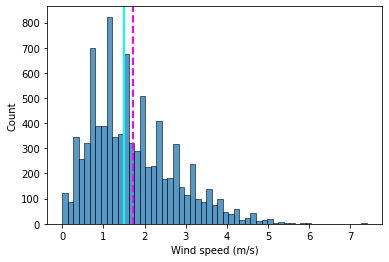

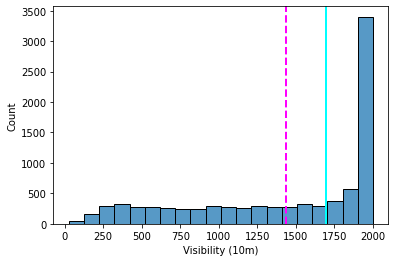

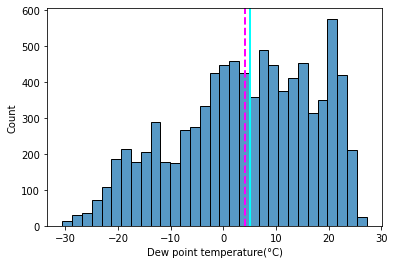

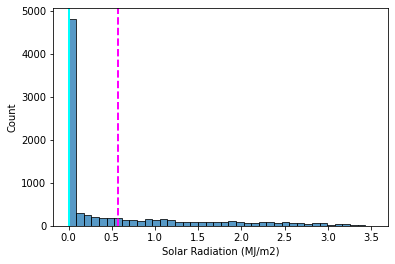

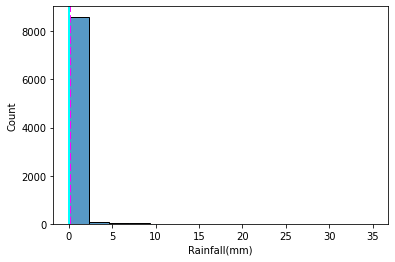

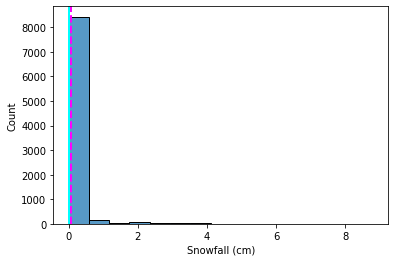

KeyError: ignored

In [17]:
#plotting histogram
for col in numeric_features[:]:
  sns.histplot(df[col])
  plt.axvline(df[col].mean(), color='magenta', linestyle='dashed', linewidth=2)
  plt.axvline(df[col].median(), color='cyan', linestyle='solid', linewidth=2)   
  plt.show()

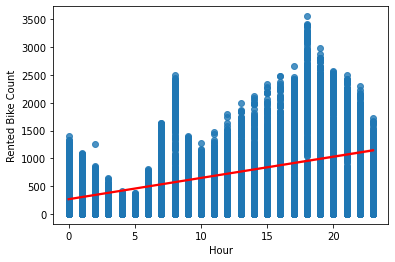

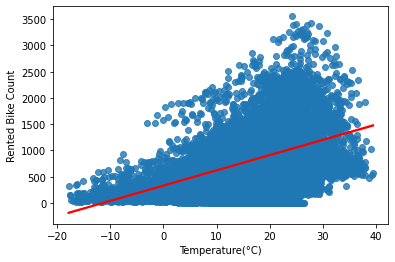

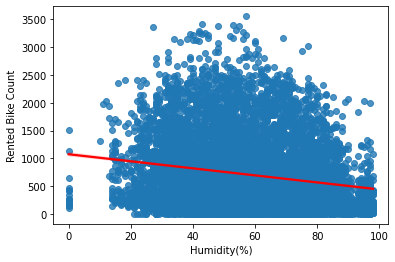

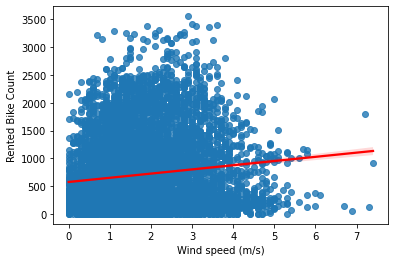

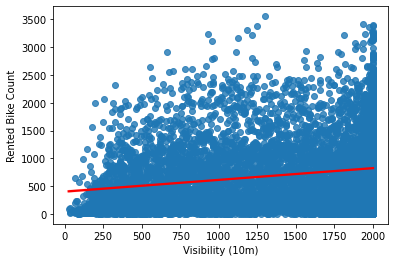

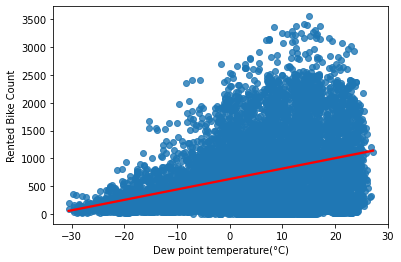

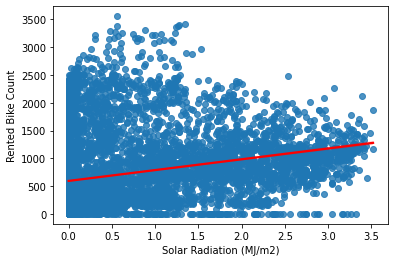

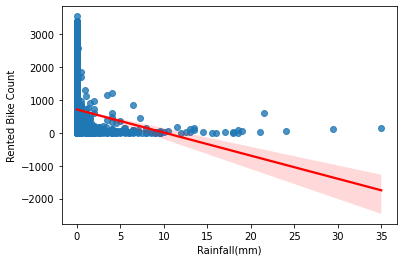

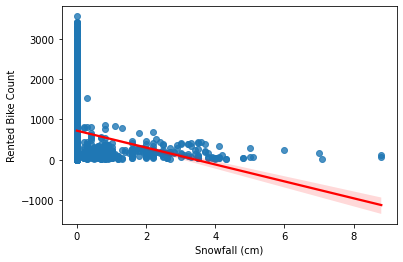

KeyError: ignored

In [15]:
# Regression plot of each columns of dataset v/s rented bike count columns
for col in numeric_features[:]:
  if col == 'Rented Bike Count':
    pass
  else:
    sns.regplot(x=df[col],y=df["Rented Bike Count"],line_kws={"color": "red"})
  
  plt.show()

In [12]:
# encoding the season names
df_copy['Winter'] = np.where(df_copy['Seasons']=='Winter', 1, 0)
df_copy['Spring'] = np.where(df_copy['Seasons']=='Spring', 1, 0)
df_copy['Summer'] = np.where(df_copy['Seasons']=='Summer', 1, 0)
df_copy['Autumn'] = np.where(df_copy['Seasons']=='Autumn', 1, 0)

df_copy.drop(columns=['Seasons'],axis=1,inplace=True)


# encoding 'Holiday' column with 0 and 1
for i in range(len(df_copy['Holiday'])):
  if df_copy['Holiday'][i] == 'No Holiday':
    df_copy['Holiday'][i] = 0
  else:
    df_copy['Holiday'][i] = 1  


# encoding 'Functioning Day' column with 0 and 1
for i in range(len(df_copy['Functioning Day'])):
  if df_copy['Functioning Day'][i] == 'Yes':
    df_copy['Functioning Day'][i] = 1
  else:
    df_copy['Functioning Day'][i] = 0 

In [16]:
# converting object type columns to float
df_copy['Functioning Day'] = df_copy['Functioning Day'].astype(float)
df_copy['Holiday'] = df_copy['Holiday'].astype(float)

In [ ]:
df_copy.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Functioning Day,month,weekdays_weekend,Winter,Spring,Summer,Autumn
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0.0,1.0,1,0,1,0,0,0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0.0,1.0,1,0,1,0,0,0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0.0,1.0,1,0,1,0,0,0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0.0,1.0,1,0,1,0,0,0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0.0,1.0,1,0,1,0,0,0


## **Models**

In [18]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [19]:
# Dependent Variable
Y = df_copy['Rented Bike Count']

#Independent Variable
X = df_copy.drop(columns=['Rented Bike Count'], axis=1).values

In [20]:
# Train Test Split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state = 0)

In [21]:
# Transforming data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Linear regression model

In [22]:
# Fitting Multiple Linear Regression to the Training set
regressor = LinearRegression()
regressor.fit(X_train,Y_train)

LinearRegression()

In [23]:
#predicting train set
Y_pred_train = regressor.predict(X_train)

#predictind test set
Y_pred_test = regressor.predict(X_test)

In [24]:
# r2 score of train set
r2_linear_train = r2_score(Y_train, Y_pred_train)
r2_linear_train

0.5524924468188792

In [25]:
# r2 score of test set
r2_linear_test = r2_score(Y_test, Y_pred_test)
r2_linear_test

0.5459678441630553

In [26]:
MSE = mean_squared_error(Y_test, Y_pred_test)
print('MSE : ', MSE)

RMSE = np.sqrt(MSE)
print('RMSE : ', RMSE)

r2_linear_test = r2_score(Y_test,Y_pred_test)
print('r2 : ', r2_linear_test)
print('adj_r2 : ', 1-(1-r2_score(Y_test,Y_pred_test))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


MSE :  190022.71310238968
RMSE :  435.9159472907474
r2 :  0.5459678441630553
adj_r2 :  0.5415165485175951


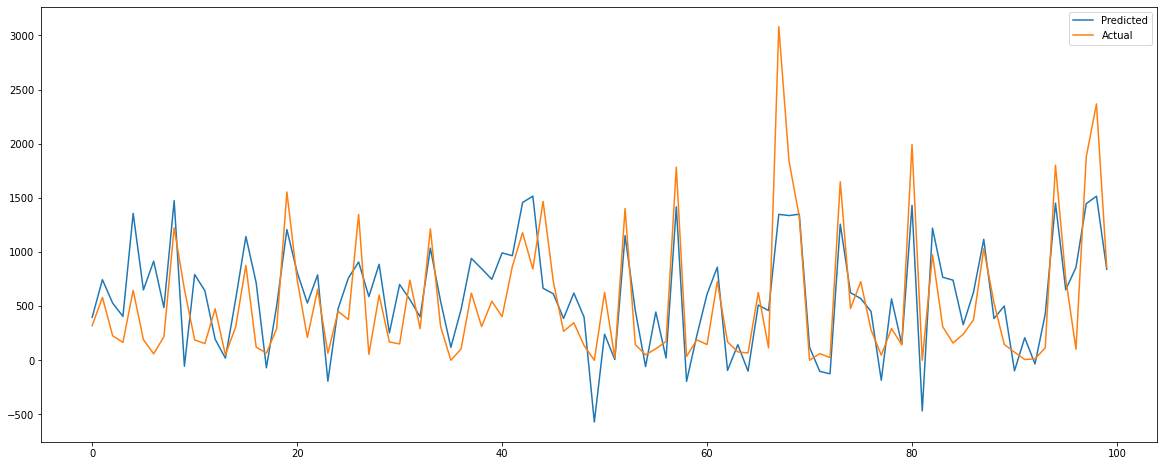

In [27]:
# plotting results from above model

plt.figure(figsize=(20,8))
plt.plot((Y_pred_test[:100]))
plt.plot(np.array((Y_test[:100])))
plt.legend(["Predicted","Actual"])
plt.show()

## **Lasso regression model**

In [39]:
# Cross validation 

from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
lasso = Lasso()
parameters = {'alpha': [0.1,0.8,1,10,20,40,80,100,300,700,1000]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring = 'neg_mean_squared_error', cv=5)
lasso_regressor.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.1, 0.8, 1, 10, 20, 40, 80, 100, 300, 700,
                                   1000]},
             scoring='neg_mean_squared_error')

In [40]:
# getting best parameters

print("The best fit alpha value is :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is : {'alpha': 0.1}

Using  {'alpha': 0.1}  the negative mean squared error is:  -186991.14392958552


In [41]:
Y_pred_lasso = lasso_regressor.predict(X_test)

In [44]:
MSE = mean_squared_error(Y_test, Y_pred_lasso)
print('MSE : ',MSE)

RMSE = np.sqrt(MSE)
print('RMSE :',RMSE)

r2_lasso_test = r2_score(Y_test, Y_pred_lasso)
print('r2  : ',r2_lasso_test)
print("Adjusted R2 : ",1-(1-r2_score(Y_test,Y_pred_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))


MSE :  190135.59754541537
RMSE : 436.0454076646323
r2  :  0.5456981228955783
Adjusted R2 :  0.5412441829239663


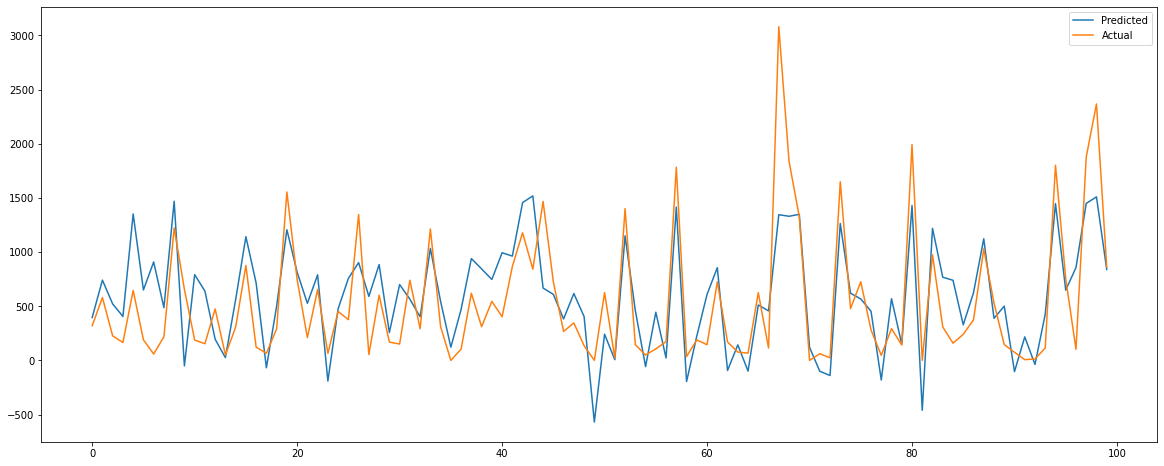

In [62]:
# plotting results from above model

plt.figure(figsize=(20,8))
plt.plot((Y_pred_lasso[:100]))
plt.plot(np.array((Y_test[:100])))
plt.legend(["Predicted","Actual"])
plt.show()

## **Ridge regression model**

In [47]:
# training model

from sklearn.linear_model import Ridge
ridge = Ridge()
parameters = {'alpha':[0.001,0.1,0.8,1,10,20,35,60,70,100,800,1200]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.1, 0.8, 1, 10, 20, 35, 60, 70, 100,
                                   800, 1200]},
             scoring='neg_mean_squared_error')

In [48]:
# getting best parameters

print("The best fit alpha value is :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is : {'alpha': 0.8}

Using  {'alpha': 0.8}  the negative mean squared error is:  -186973.4011608733


In [49]:
Y_pred_ridge = ridge_regressor.predict(X_test)

In [50]:
# evaluating metrics

MSE  = mean_squared_error(Y_test,Y_pred_ridge)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2_ridge_test = r2_score(Y_test,Y_pred_ridge)
print("R2 :" ,r2_ridge_test)
print("Adjusted R2 : ",1-(1-r2_score(Y_test,Y_pred_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 190228.91902810926
RMSE : 436.152403441858
R2 : 0.5454751445300889
Adjusted R2 :  0.5412441829239663


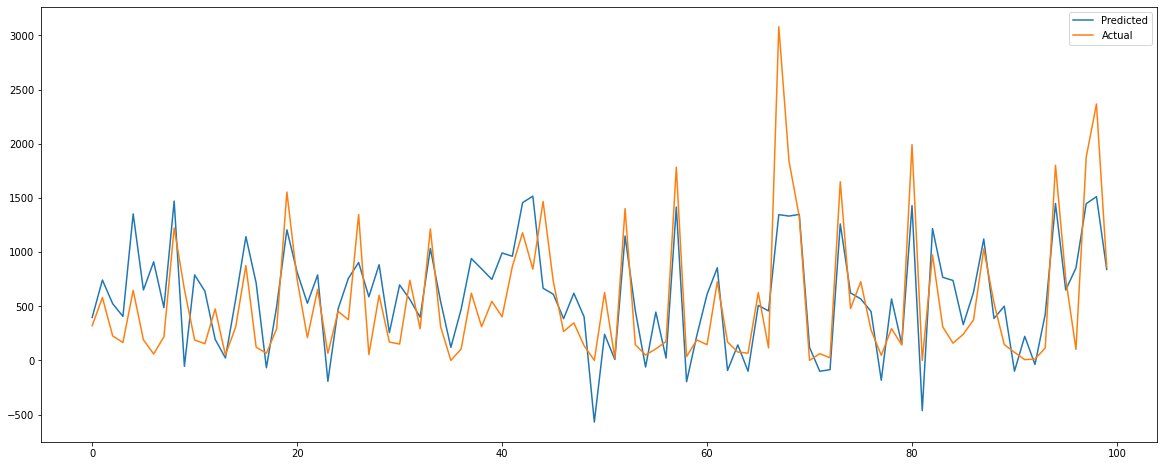

In [63]:
# plotting results from above model

plt.figure(figsize=(20,8))
plt.plot((Y_pred_ridge[:100]))
plt.plot(np.array((Y_test[:100])))
plt.legend(["Predicted","Actual"])
plt.show()

## **Elasticnet model**

In [51]:
# training model

from sklearn.linear_model import ElasticNet
elasticnet = ElasticNet(alpha=0.1,l1_ratio=0.5)
elasticnet.fit(X_train, Y_train)

ElasticNet(alpha=0.1)

In [52]:
elasticnet.score(X_train, Y_train)

0.4646378984171805

In [53]:
Y_pred_en = elasticnet.predict(X_test)

In [54]:
# evaluating metrics

MSE  = mean_squared_error(Y_test, Y_pred_en)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2_elasticnet_test = r2_score(Y_test,Y_pred_en)
print("R2 :" ,r2_elasticnet_test)
print("Adjusted R2 : ",1-(1-r2_score(Y_test, Y_pred_en))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 233055.32683676406
RMSE : 482.7580417111289
R2 : 0.44314755459804545
Adjusted R2 :  0.4376882168980263


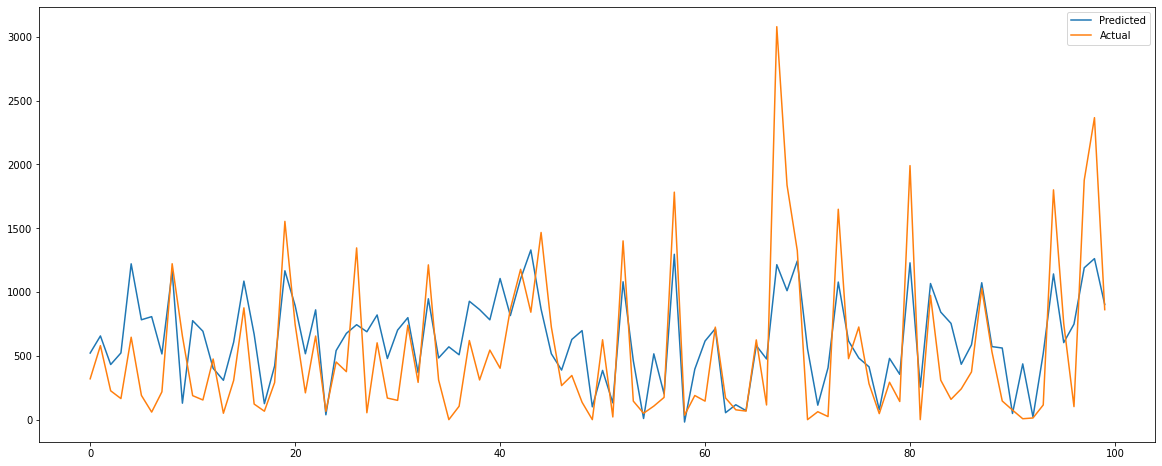

In [64]:
# plotting results from above model

plt.figure(figsize=(20,8))
plt.plot((Y_pred_en[:100]))
plt.plot(np.array((Y_test[:100])))
plt.legend(["Predicted","Actual"])
plt.show()

## Crossvalidation on elasticnet model


In [58]:
elastic = ElasticNet()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],'l1_ratio':[0.1,0.3,0.4,0.5,0.6,0.7,0.8]}
elastic_regularization = GridSearchCV(elastic, parameters, scoring='neg_mean_squared_error',cv=5)
elastic_regularization.fit(X_train, Y_train)


GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100],
                         'l1_ratio': [0.1, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]},
             scoring='neg_mean_squared_error')

In [59]:
print("The best fit alpha value is :" ,elastic_regularization.best_params_)
print("\nUsing ",elastic_regularization.best_params_, " the negative mean squared error is: ", elastic_regularization.best_score_)

The best fit alpha value is : {'alpha': 0.0001, 'l1_ratio': 0.1}

Using  {'alpha': 0.0001, 'l1_ratio': 0.1}  the negative mean squared error is:  -186963.74060437953


In [60]:
Y_pred_elastic = elastic_regularization.predict(X_test)

In [61]:
MSE  = mean_squared_error(Y_test, Y_pred_elastic)
print("MSE :" , MSE)
  
RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2_elastic_cv_test = r2_score(Y_test, Y_pred_elastic)
print("R2 :" ,r2_elastic_cv_test)
print("Adjusted R2 : ",1-(1-r2_score(Y_test,Y_pred_elastic))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 190181.9204739584
RMSE : 436.0985215223257
R2 : 0.5455874408683212
Adjusted R2 :  0.541132415778795


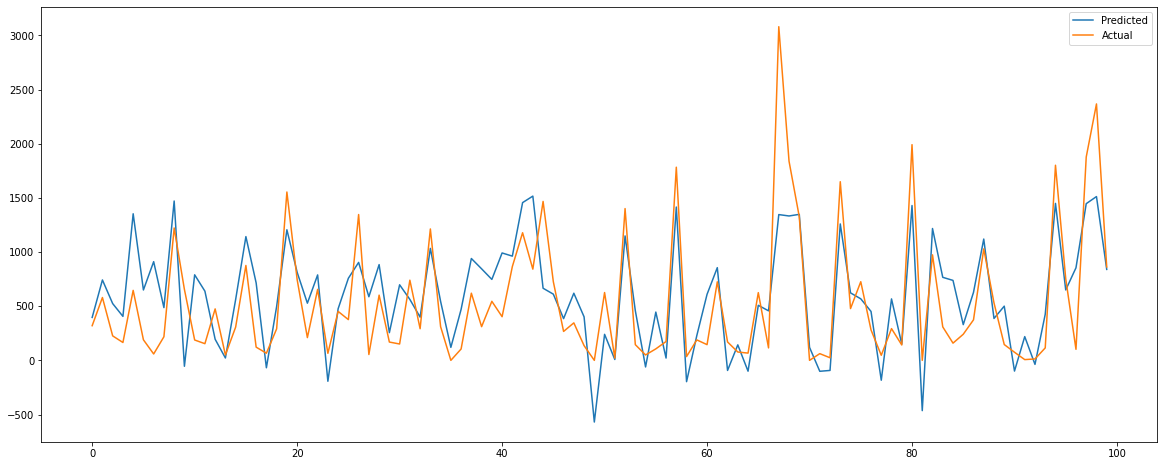

In [65]:
# plotting results from above model

plt.figure(figsize=(20,8))
plt.plot((Y_pred_elastic[:100]))
plt.plot(np.array((Y_test[:100])))
plt.legend(["Predicted","Actual"])
plt.show()

## **Decision-tree regression model**

In [67]:
# training model
from sklearn.tree import DecisionTreeRegressor
decisionTree = DecisionTreeRegressor()
param = {'max_depth' : [1,4,5,6,7,8,10,15,20]}

gridSearch_decisionTree = GridSearchCV(decisionTree, param, scoring='r2', cv=5)
gridSearch_decisionTree.fit(X_train,Y_train)

best_DecisionTree = gridSearch_decisionTree.best_estimator_
bestDecisionTree_testScore = best_DecisionTree.score(X_test,Y_test)
r2_decision_test = best_DecisionTree.score(X_test,Y_test)


In [68]:
# extracting best parameters

print(f"The best Decision Tree R2 score is {gridSearch_decisionTree.best_score_} with max depth {gridSearch_decisionTree.best_params_['max_depth']}")
print('\n')
print(f"The best R2 test score is : {bestDecisionTree_testScore} with max depth = {gridSearch_decisionTree.best_params_['max_depth']}")

The best Decision Tree R2 score is 0.8152030373025007 with max depth 10


The best R2 test score is : 0.8330383327520493 with max depth = 10


## **Random forest regression model**

In [73]:
# training model

from sklearn.ensemble import RandomForestRegressor
randomForestAlgo = RandomForestRegressor()

param = {'n_estimators' : [int(x) for x in np.linspace(start=10,stop=30, num=5)], 
         'max_depth' : [10,15,20],
         'min_samples_split':[2,4],
         'min_samples_leaf':[1,2],
         'bootstrap' : [True,False]
        }

gridSearch_RandomForest=GridSearchCV(randomForestAlgo,param,scoring='r2',cv=5)
gridSearch_RandomForest.fit(X_train,Y_train)

best_randomForest=gridSearch_RandomForest.best_estimator_
bestRandomForest_testScore=best_randomForest.score(X_test,Y_test)
r2_randomforest_test = best_randomForest.score(X_test,Y_test)


In [75]:
# getting best parameters

print(f"The best Random Forest R2 train score is : {gridSearch_RandomForest.best_score_} with n estimators = {gridSearch_RandomForest.best_params_['n_estimators']}, max depth : {gridSearch_RandomForest.best_params_['max_depth']}, min samples split : {gridSearch_RandomForest.best_params_['min_samples_split']} and min samples leaf : {gridSearch_RandomForest.best_params_['min_samples_leaf']}")
print('\n')
print(f"The best Random Forest R2 test score is : {bestRandomForest_testScore} with n estimators = {gridSearch_RandomForest.best_params_['n_estimators']}, max depth : {gridSearch_RandomForest.best_params_['max_depth']}, min samples split : {gridSearch_RandomForest.best_params_['min_samples_split']} and min samples leaf : {gridSearch_RandomForest.best_params_['min_samples_leaf']}")

The best Random Forest R2 train score is : 0.8920722069280578 with n estimators = 30, max depth : 20, min samples split : 4 and min samples leaf : 1


The best Random Forest R2 test score is : 0.8946337708418542 with n estimators = 30, max depth : 20, min samples split : 4 and min samples leaf : 1


## **Result**

In [81]:
# creating a list of all model names

model_list = ['Linear regression','Lasso regression','Ridge regression','Decision Tree Regressor','Elasticnet regularization','Elasticnet(cv) regressor','Random Forest Regressor']

In [86]:
# creating a list of all model r2 score results from above

result_list = [r2_linear_test,r2_lasso_test, r2_ridge_test,r2_decision_test, r2_elasticnet_test, r2_elastic_cv_test, r2_randomforest_test]

In [87]:
# creating result Dataframe
results_df = pd.DataFrame()  
results_df['model name'] = model_list
results_df['R2-score'] = result_list

In [88]:
results_df

,model name,R2-score
0,Linear regression,0.545968
1,Lasso regression,0.545698
2,Ridge regression,0.545475
3,Decision Tree Regressor,0.833038
4,Elasticnet regularization,0.443148
5,Elasticnet(cv) regressor,0.545587
6,Random Forest Regressor,0.894634


Text(0.5, 1.0, 'R2-score')

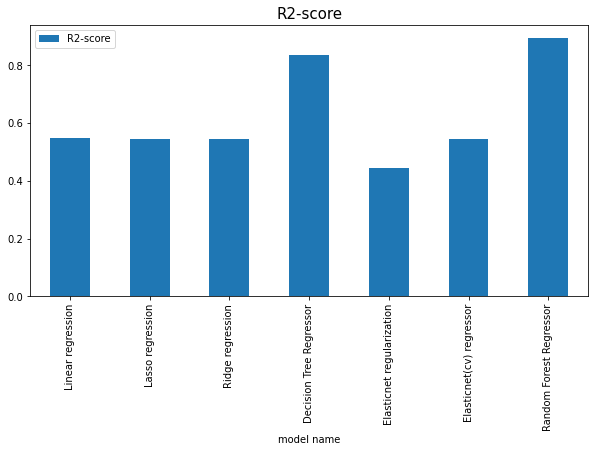

In [103]:
fig, ax = plt.subplots(figsize=(10,5))
results_df.plot(kind='bar', ax=ax, x = 'model name', y = 'R2-score')
plt.title('R2-score',fontsize=15) 

## **Final Conclusion :**
                                              

1.    There is less demand of rented bike during winter season and most demand in summer.

2.   From 5 AM rented bike demand starts to rise and after 6 PM demand starts to decrease.

3.    8 AM and 6 PM is peak hour so we can say that during office opening and closing time there is high demand.

4.  Rainfall and snowfall also play an important factor in bike renting demand, as rainfall and snowfall increase demand decreases.

5.   After performing the various models the Random Forest regression and Decision Tree regression model found to be the best model that can be used for the Bike Sharing Demand Prediction since the r2, adjusted_r2 shows a higher value for the Random Forest and Decision Tree models !

6.   We can use either Random Forest or Decision Tree model for the bike rental stations.


